### Package Versions

- **Python version**: `3.9.13`
- **NumPy version**: `1.23.5`
- **Matplotlib version**: `3.4.2`
- **SciPy version**: `1.9.1`
- **Pandas version**: `1.5.3`



In [2]:
# Import the necessary libraries
import numpy as np # For calculations
import matplotlib.pyplot as plt # For plotting 
from scipy.optimize import curve_fit # For curve fitting
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator) #make plot nicer
import pandas as pd # For reading the data
import os #For flexible path way to data

In [3]:
# Define the path in a more flexible way
root_folder = os.getcwd()
data_file = os.path.join(root_folder, 'pressureRatio.dat')
#Read data file using pandas package
data = pd.read_csv(data_file, delim_whitespace=True )
columns_title =data.columns
print("Column tiltes", columns_title)
data.head()

Column tiltes Index(['Num', 'Radius', 'R_e+', 'R_e-', 'E1', 'E1_e+', 'E1_e-', 'E2', 'E2_e+',
       'E2_e+.1', 'ratio', 'r_e+', 'r_e-'],
      dtype='object')


,Num,Radius,R_e+,R_e-,E1,E1_e+,E1_e-,E2,E2_e+,E2_e+.1,ratio,r_e+,r_e-
0,1,221.1,11.0,12.3,8.30,0.76,0.88,9.67,1.14,1.12,0.86,0.08,0.07
1,2,268.5,22.1,20.7,4.92,0.77,0.70,4.19,0.82,0.70,1.17,0.16,0.15
2,3,138.4,12.7,11.9,3.03,0.53,0.49,2.61,0.59,0.49,1.16,0.20,0.18
3,4,714.3,23.5,34.5,49.61,3.15,3.19,60.62,4.84,6.13,0.82,0.06,0.05
4,5,182.3,18.5,15.1,2.75,0.49,0.43,3.30,0.81,0.61,0.83,0.14,0.14


### Section a)

For calculating the wighted average for the data set $\{x_1,\cdots,x_N\}$, such that $x_i$ has uncertainty $\sigma_i$; we require to define some wight for $x_i$ such as
$$ w_i =\frac{1}{\sigma^2}, \sigma^2 = \frac{r_{e+}+r_{e-}}{2}$$
then according to the definition the wighted average will be 
$$ \bar{x} = \frac{\sum_{i=1}^{N}x_i\times w_i}{\sum_{i=1}^{N} w_i}.$$

The 



In [11]:
# Function to calculate weighted average and standard deviation
def weighted_average_std(u_bound, l_bound, data):
    '''u_bound and l_bound are lists of floats given by input data set
    data is given list of float numbers that are given in each column
    output: float numbers average wighted and Standard deviation'''
    sigma2 = ((u_bound+l_bound)/2)**2 # Average the asymmetric errors
    weight = 1/sigma2
    return np.sum(data*weight)/np.sum(weight) , np.sqrt(1/np.sum(weight))
# Weighted average and standard deviation for 'ratio'
weighted_avg ,weighted_std  = weighted_average_std(data['r_e+'],data['r_e-'],data['ratio'])
# Print the result
print(f"Weighted Average of ratio: {weighted_avg :.2f} ± {weighted_std:.2f}")

Weighted Average of ratio: 0.90 ± 0.02


### Section b)
The linear averaging is the unweighted averaging. So , the Linear average of the data set will be:
$$\bar{x} = \frac{\sum_{i=1}^{N} x_i}{N}.$$

The standard deviation of the linear average is simply the square root of the sum of the squared individual uncertainties, divided by the number of data points.
$$ \sigma_{linear} = \sqrt{\frac{1}{N^2}\sum_{i=1}^N \sigma_i^2} $$


In [7]:
#linear averaging
def Linear_average(u_bound, l_bound, data):
    Linear_average = np.mean(data) # Mean of Data
    Linear_std = np.sqrt(np.mean(((u_bound+l_bound)/2)**2)) # mean of the averaged uncertainties
    return Linear_average, Linear_std

# Linear average and standard deviation for 'ratio'
linear_avg ,linear_std  = Linear_average(data['r_e+'],data['r_e-'],data['ratio'])
# Print the result
print(f"Linear Average of ratio: {linear_avg :.2f} ± {linear_std:.2f}")

Linear Average of ratio: 1.01 ± 0.14


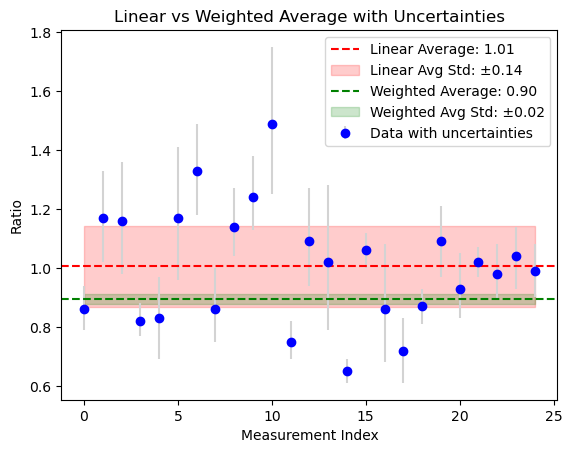

In [12]:
n = len (data['ratio']) # number of data points
#Plot the data points with error bars
plt.errorbar(range(n), data['ratio'], yerr=[data['r_e-'], data['r_e+']], fmt='o', label='Data with uncertainties', color='blue', ecolor='lightgray')

# Plot the linear average line with its uncertainty band
plt.axhline(y=linear_avg, color='red', linestyle='--', label=f'Linear Average: {linear_avg:.2f}')
plt.fill_between(range(n), linear_avg - linear_std, linear_avg +linear_std, color='red', alpha=0.2, label=f'Linear Avg Std: ±{linear_std:.2f}')

#Plot the weighted average line with its uncertainty band
plt.axhline(y=weighted_avg, color='green', linestyle='--', label=f'Weighted Average: {weighted_avg:.2f}')
plt.fill_between(range(n), weighted_avg - weighted_std, weighted_avg + weighted_std, color='green', alpha=0.2, label=f'Weighted Avg Std: ±{weighted_std:.2f}')

#Labeling the plot
plt.xlabel('Measurement Index')
plt.ylabel('Ratio')
plt.title('Linear vs Weighted Average with Uncertainties')
plt.legend()

# Show the plot
plt.show()

The linear average is often greater than the weighted average because the linear average gives equal importance to all values, including those with large uncertainties (which are often extreme). The weighted average, on the other hand, downweights these less reliable (extreme) values, resulting in a smaller overall average.
In the weighted average, the extreme values with large uncertainties are downweighted, meaning they contribute less to the final result. This results in the weighted average being "pulled" towards the more reliable, lower-uncertainty data points, which are often closer to the center of the distribution (closer to the true value).

### Section c)
